# Determining the historic electricity price for Czechia
By: Ilisa Goenka and Shafin Shabir


### Copied from SVK tryouts.ipynb

In [1]:
import re

import pypsa
import matplotlib.pyplot as plt
from icecream import ic
import os
from os.path import normpath, exists
os.path.isdir("/pypsa-eur")
os. getcwd()
import pandas as pd

In [7]:
networkdir ="E:\\Cerge-ei\\RA - electricity project\\pypsa-eur_v2\\results\\networks\\"
networkdir_SVK = "/home/slvst/PycharmProjects/pypsa-eur/networks"
file_path = os.path.join(networkdir_SVK,"elec_s_212_ec_lv1_1H.nc")
n= pypsa.Network(file_path)

Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 20, 0], imported network file PyPSA version [0, 19, 3].

INFO:pypsa.io:Imported network elec_s_212_ec_lv1_1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


(<matplotlib.collections.PatchCollection at 0x7f4191608fa0>,
 <matplotlib.collections.LineCollection at 0x7f418955c370>)

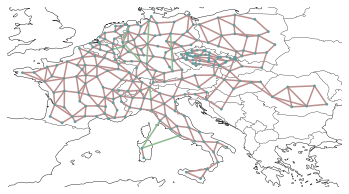

In [8]:
n.plot()

## Determining the prices
Understanding the components of the network

In [9]:
list(n.components)

['Network',
 'SubNetwork',
 'Bus',
 'Carrier',
 'GlobalConstraint',
 'Line',
 'LineType',
 'Transformer',
 'TransformerType',
 'Link',
 'Load',
 'Generator',
 'StorageUnit',
 'Store',
 'ShuntImpedance']

In [29]:
list(n.buses_t)

['v_mag_pu_set', 'p', 'q', 'v_mag_pu', 'v_ang', 'marginal_price']

In [10]:
demand = n.loads_t.p #For the demand
n.loads_t.p_set

Load,AT0 0,AT0 1,AT0 2,AT0 3,AT0 4,AT0 5,BE0 0,BE0 1,BE0 2,BE0 3,...,RO0 1,RO0 2,RO0 3,RO0 4,RO0 5,SI0 0,SI0 1,SK0 0,SK0 1,SK0 2
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-02-01 00:00:00,2470.086673,422.620525,1076.666650,1269.990999,784.067530,638.774569,2107.062218,776.047296,2506.157233,2023.314740,...,1019.463681,1137.952556,1705.815759,1231.322106,818.038653,1126.840484,754.562570,724.635436,1850.084799,708.279765
2019-02-01 01:00:00,2429.978883,415.758266,1059.184381,1249.369645,771.336310,628.402530,2029.981697,747.657944,2414.477023,1949.297868,...,1012.626857,1130.321111,1694.376056,1223.064497,812.552644,1109.311356,743.208630,718.455176,1834.305825,702.238999
2019-02-01 02:00:00,2372.929009,405.997293,1034.317360,1220.037546,753.227248,613.649197,1989.105664,732.602985,2365.858731,1910.046497,...,1025.057446,1144.196466,1715.175517,1238.078331,822.527205,1095.588982,740.173365,715.144323,1825.852802,699.002875
2019-02-01 03:00:00,2429.287370,415.639951,1058.882962,1249.014104,771.116807,628.223701,1960.103144,721.921133,2331.362894,1882.196714,...,1053.492418,1175.936341,1762.754283,1272.422478,845.344012,1111.821907,746.303198,729.270630,1861.919031,712.810339
2019-02-01 04:00:00,2647.459919,452.968275,1153.980479,1361.187162,840.370252,684.644019,2050.030419,755.042043,2438.323138,1968.549731,...,1133.669718,1265.432381,1896.910803,1369.261710,909.679928,1205.469471,806.070424,770.104488,1966.172971,752.722540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-27 19:00:00,2910.235097,497.927906,1268.519484,1496.292587,923.781691,752.598761,2177.914010,802.142558,2590.428940,2091.350450,...,1285.944433,1435.405480,2151.704195,1553.181184,1031.868296,1410.025418,985.399056,844.929774,2157.211274,825.858952
2019-02-27 20:00:00,2694.137088,460.954525,1174.326223,1385.186152,855.186757,696.714927,2055.480557,757.049371,2444.805578,1973.783247,...,1172.981455,1309.313191,1962.689097,1416.742962,941.224476,1304.348046,911.086280,790.631779,2018.581709,772.786512
2019-02-27 21:00:00,2603.548803,445.455284,1134.840408,1338.610334,826.431761,673.288424,2019.470717,743.786669,2401.975177,1939.204658,...,1099.796363,1227.622038,1840.232273,1328.349011,882.499251,1223.036261,836.638723,748.694303,1911.510094,731.795602


In [31]:
demand

Load,AT0 0,AT0 1,AT0 2,AT0 3,AT0 4,AT0 5,BE0 0,BE0 1,BE0 2,BE0 3,...,RO0 1,RO0 2,RO0 3,RO0 4,RO0 5,SI0 0,SI0 1,SK0 0,SK0 1,SK0 2
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-02-01 00:00:00,2470.086673,422.620525,1076.666650,1269.990999,784.067530,638.774569,2107.062218,776.047296,2506.157233,2023.314740,...,1019.463681,1137.952556,1705.815759,1231.322106,818.038653,1126.840484,754.562570,724.635436,1850.084799,708.279765
2019-02-01 01:00:00,2429.978883,415.758266,1059.184381,1249.369645,771.336310,628.402530,2029.981697,747.657944,2414.477023,1949.297868,...,1012.626857,1130.321111,1694.376056,1223.064497,812.552644,1109.311356,743.208630,718.455176,1834.305825,702.238999
2019-02-01 02:00:00,2372.929009,405.997293,1034.317360,1220.037546,753.227248,613.649197,1989.105664,732.602985,2365.858731,1910.046497,...,1025.057446,1144.196466,1715.175517,1238.078331,822.527205,1095.588982,740.173365,715.144323,1825.852802,699.002875
2019-02-01 03:00:00,2429.287370,415.639951,1058.882962,1249.014104,771.116807,628.223701,1960.103144,721.921133,2331.362894,1882.196714,...,1053.492418,1175.936341,1762.754283,1272.422478,845.344012,1111.821907,746.303198,729.270630,1861.919031,712.810339
2019-02-01 04:00:00,2647.459919,452.968275,1153.980479,1361.187162,840.370252,684.644019,2050.030419,755.042043,2438.323138,1968.549731,...,1133.669718,1265.432381,1896.910803,1369.261710,909.679928,1205.469471,806.070424,770.104488,1966.172971,752.722540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-27 19:00:00,2910.235097,497.927906,1268.519484,1496.292587,923.781691,752.598761,2177.914010,802.142558,2590.428940,2091.350450,...,1285.944433,1435.405480,2151.704195,1553.181184,1031.868296,1410.025418,985.399056,844.929774,2157.211274,825.858952
2019-02-27 20:00:00,2694.137088,460.954525,1174.326223,1385.186152,855.186757,696.714927,2055.480557,757.049371,2444.805578,1973.783247,...,1172.981455,1309.313191,1962.689097,1416.742962,941.224476,1304.348046,911.086280,790.631779,2018.581709,772.786512
2019-02-27 21:00:00,2603.548803,445.455284,1134.840408,1338.610334,826.431761,673.288424,2019.470717,743.786669,2401.975177,1939.204658,...,1099.796363,1227.622038,1840.232273,1328.349011,882.499251,1223.036261,836.638723,748.694303,1911.510094,731.795602


In [32]:
n.loads_t.p

Load,AT0 0,AT0 1,AT0 2,AT0 3,AT0 4,AT0 5,BE0 0,BE0 1,BE0 2,BE0 3,...,RO0 1,RO0 2,RO0 3,RO0 4,RO0 5,SI0 0,SI0 1,SK0 0,SK0 1,SK0 2
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-02-01 00:00:00,2470.086673,422.620525,1076.666650,1269.990999,784.067530,638.774569,2107.062218,776.047296,2506.157233,2023.314740,...,1019.463681,1137.952556,1705.815759,1231.322106,818.038653,1126.840484,754.562570,724.635436,1850.084799,708.279765
2019-02-01 01:00:00,2429.978883,415.758266,1059.184381,1249.369645,771.336310,628.402530,2029.981697,747.657944,2414.477023,1949.297868,...,1012.626857,1130.321111,1694.376056,1223.064497,812.552644,1109.311356,743.208630,718.455176,1834.305825,702.238999
2019-02-01 02:00:00,2372.929009,405.997293,1034.317360,1220.037546,753.227248,613.649197,1989.105664,732.602985,2365.858731,1910.046497,...,1025.057446,1144.196466,1715.175517,1238.078331,822.527205,1095.588982,740.173365,715.144323,1825.852802,699.002875
2019-02-01 03:00:00,2429.287370,415.639951,1058.882962,1249.014104,771.116807,628.223701,1960.103144,721.921133,2331.362894,1882.196714,...,1053.492418,1175.936341,1762.754283,1272.422478,845.344012,1111.821907,746.303198,729.270630,1861.919031,712.810339
2019-02-01 04:00:00,2647.459919,452.968275,1153.980479,1361.187162,840.370252,684.644019,2050.030419,755.042043,2438.323138,1968.549731,...,1133.669718,1265.432381,1896.910803,1369.261710,909.679928,1205.469471,806.070424,770.104488,1966.172971,752.722540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-27 19:00:00,2910.235097,497.927906,1268.519484,1496.292587,923.781691,752.598761,2177.914010,802.142558,2590.428940,2091.350450,...,1285.944433,1435.405480,2151.704195,1553.181184,1031.868296,1410.025418,985.399056,844.929774,2157.211274,825.858952
2019-02-27 20:00:00,2694.137088,460.954525,1174.326223,1385.186152,855.186757,696.714927,2055.480557,757.049371,2444.805578,1973.783247,...,1172.981455,1309.313191,1962.689097,1416.742962,941.224476,1304.348046,911.086280,790.631779,2018.581709,772.786512
2019-02-27 21:00:00,2603.548803,445.455284,1134.840408,1338.610334,826.431761,673.288424,2019.470717,743.786669,2401.975177,1939.204658,...,1099.796363,1227.622038,1840.232273,1328.349011,882.499251,1223.036261,836.638723,748.694303,1911.510094,731.795602


In [33]:
price = n.buses_t.marginal_price #For the Marginal Price

In [34]:
price.sort_index(axis=1)

Bus,AT0 0,AT0 1,AT0 2,AT0 3,AT0 4,AT0 5,BE0 0,BE0 1,BE0 2,BE0 3,...,RO0 1,RO0 2,RO0 3,RO0 4,RO0 5,SI0 0,SI0 1,SK0 0,SK0 1,SK0 2
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-02-01 00:00:00,28.962681,28.513207,28.969083,28.992237,28.576457,29.265877,38.814695,38.192157,37.555111,38.492256,...,29.210396,29.210396,29.210396,29.210396,29.210396,31.204580,31.668839,28.335559,28.526391,28.280846
2019-02-01 01:00:00,28.382788,28.205058,28.493646,28.462450,28.269832,28.580216,31.319634,31.161320,30.978342,31.237636,...,28.512459,28.512459,28.512459,28.512459,28.512459,29.651723,29.913604,28.029616,28.111284,28.076218
2019-02-01 02:00:00,28.128419,27.828341,28.182068,28.168068,27.947588,28.236792,29.772605,29.544039,30.336783,29.654221,...,28.206995,28.206995,28.206995,28.206995,28.206995,28.837858,28.983740,27.964804,27.990930,28.035417
2019-02-01 03:00:00,28.128419,27.828341,28.182068,28.168068,27.947588,28.236792,29.772605,29.544039,30.336783,29.654221,...,28.206995,28.206995,28.206995,28.206995,28.206995,28.837858,28.983740,27.964804,27.990930,28.035417
2019-02-01 04:00:00,28.971260,28.461642,28.962087,28.991525,28.542485,29.268945,38.758763,38.101969,37.680519,38.418581,...,29.220685,29.220685,29.220685,29.220685,29.220685,31.200073,31.661567,28.357767,28.544913,28.306666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-27 19:00:00,37.525976,33.861535,35.404536,36.311156,34.090931,37.368421,36.447749,35.996133,36.983271,36.213837,...,38.848318,38.848318,38.848318,38.848318,38.848318,40.150822,40.034424,26.086421,24.426286,26.985648
2019-02-27 20:00:00,29.434026,27.610691,28.808516,28.977415,27.913245,28.236792,29.625047,29.357623,30.209944,29.486537,...,30.722827,30.722827,30.722827,30.722827,30.722827,35.947725,36.187290,28.178307,28.278150,28.190290
2019-02-27 21:00:00,29.107805,27.491042,27.799660,28.387336,27.647760,29.345364,29.715266,29.437469,30.346094,29.571383,...,29.841017,29.841017,29.841017,29.841017,29.841017,33.213949,34.037860,28.285964,28.441565,28.259818


In [35]:
import pandas as pd

In [36]:
price.columns.get_loc("CZ0 0")

21

In [37]:
price.columns.get_loc("CZ0 9")

69

In [38]:
price_cz = price.iloc[:,21:70]
price_cz

Bus,CZ0 0,CZ0 1,CZ0 10,CZ0 11,CZ0 12,CZ0 13,CZ0 14,CZ0 15,CZ0 16,CZ0 17,...,CZ0 44,CZ0 45,CZ0 46,CZ0 47,CZ0 48,CZ0 5,CZ0 6,CZ0 7,CZ0 8,CZ0 9
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-02-01 00:00:00,27.186472,27.809392,29.705281,28.999061,29.164135,27.726497,24.002522,27.474576,27.028655,24.993497,...,28.568159,29.589021,26.763636,12.298287,26.721329,27.899221,29.674449,30.019422,23.174043,23.104284
2019-02-01 01:00:00,27.009581,27.566331,29.495929,28.790216,28.952149,27.503727,23.844696,27.260928,26.817835,24.819359,...,28.235826,29.375927,26.571342,12.298287,26.523739,27.748297,29.461124,29.803809,23.029984,22.961378
2019-02-01 02:00:00,27.219809,27.629485,29.178800,28.618096,28.745831,27.604176,24.771452,27.420460,27.074364,25.524461,...,28.126762,29.081329,26.875874,15.811370,26.837444,27.799562,29.145401,29.414736,24.141965,24.088959
2019-02-01 03:00:00,27.219809,27.629485,29.178800,28.618096,28.745831,27.604176,24.771452,27.420460,27.074364,25.524461,...,28.126762,29.081329,26.875874,15.811370,26.837444,27.799562,29.145401,29.414736,24.141965,24.088959
2019-02-01 04:00:00,27.212021,27.833403,29.741122,29.030891,29.196841,27.754008,24.024202,27.502535,27.055429,25.016459,...,28.591399,29.623896,26.788219,12.298287,26.745704,27.926399,29.708921,30.055243,23.194637,23.124788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-27 19:00:00,28.827295,29.278400,33.378321,32.669779,32.798917,30.709727,26.122009,30.387991,29.846423,27.162204,...,31.415934,33.217930,28.540582,12.298287,28.519970,29.310590,33.385083,33.750444,25.244376,25.170846
2019-02-27 20:00:00,27.207774,27.840484,29.825311,29.099473,29.270369,27.812390,24.065788,27.567015,27.117802,25.056261,...,28.678205,29.705001,26.799985,12.298287,26.760844,27.895159,29.786190,30.136949,23.237322,23.167583
2019-02-27 21:00:00,27.192557,27.816516,29.719568,28.979794,29.156383,27.719549,24.007493,27.482465,27.035639,24.998852,...,28.589260,29.598755,26.769764,12.298287,26.727504,27.905235,29.673128,30.027267,23.178696,23.108910


In [39]:
demand.sort_index(axis=1)

Load,AT0 0,AT0 1,AT0 2,AT0 3,AT0 4,AT0 5,BE0 0,BE0 1,BE0 2,BE0 3,...,RO0 1,RO0 2,RO0 3,RO0 4,RO0 5,SI0 0,SI0 1,SK0 0,SK0 1,SK0 2
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-02-01 00:00:00,2470.086673,422.620525,1076.666650,1269.990999,784.067530,638.774569,2107.062218,776.047296,2506.157233,2023.314740,...,1019.463681,1137.952556,1705.815759,1231.322106,818.038653,1126.840484,754.562570,724.635436,1850.084799,708.279765
2019-02-01 01:00:00,2429.978883,415.758266,1059.184381,1249.369645,771.336310,628.402530,2029.981697,747.657944,2414.477023,1949.297868,...,1012.626857,1130.321111,1694.376056,1223.064497,812.552644,1109.311356,743.208630,718.455176,1834.305825,702.238999
2019-02-01 02:00:00,2372.929009,405.997293,1034.317360,1220.037546,753.227248,613.649197,1989.105664,732.602985,2365.858731,1910.046497,...,1025.057446,1144.196466,1715.175517,1238.078331,822.527205,1095.588982,740.173365,715.144323,1825.852802,699.002875
2019-02-01 03:00:00,2429.287370,415.639951,1058.882962,1249.014104,771.116807,628.223701,1960.103144,721.921133,2331.362894,1882.196714,...,1053.492418,1175.936341,1762.754283,1272.422478,845.344012,1111.821907,746.303198,729.270630,1861.919031,712.810339
2019-02-01 04:00:00,2647.459919,452.968275,1153.980479,1361.187162,840.370252,684.644019,2050.030419,755.042043,2438.323138,1968.549731,...,1133.669718,1265.432381,1896.910803,1369.261710,909.679928,1205.469471,806.070424,770.104488,1966.172971,752.722540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-27 19:00:00,2910.235097,497.927906,1268.519484,1496.292587,923.781691,752.598761,2177.914010,802.142558,2590.428940,2091.350450,...,1285.944433,1435.405480,2151.704195,1553.181184,1031.868296,1410.025418,985.399056,844.929774,2157.211274,825.858952
2019-02-27 20:00:00,2694.137088,460.954525,1174.326223,1385.186152,855.186757,696.714927,2055.480557,757.049371,2444.805578,1973.783247,...,1172.981455,1309.313191,1962.689097,1416.742962,941.224476,1304.348046,911.086280,790.631779,2018.581709,772.786512
2019-02-27 21:00:00,2603.548803,445.455284,1134.840408,1338.610334,826.431761,673.288424,2019.470717,743.786669,2401.975177,1939.204658,...,1099.796363,1227.622038,1840.232273,1328.349011,882.499251,1223.036261,836.638723,748.694303,1911.510094,731.795602


In [40]:
demand.columns.get_loc("CZ0 0")

21

In [41]:
demand.columns.get_loc("CZ0 9")

51

In [42]:
demand_cz = demand.iloc[:,21:52]
demand_cz

Load,CZ0 0,CZ0 1,CZ0 11,CZ0 12,CZ0 13,CZ0 14,CZ0 15,CZ0 16,CZ0 17,CZ0 18,...,CZ0 3,CZ0 30,CZ0 4,CZ0 41,CZ0 47,CZ0 5,CZ0 6,CZ0 7,CZ0 8,CZ0 9
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-02-01 00:00:00,317.070648,228.714925,267.722147,128.247244,194.896053,320.154525,577.472408,570.310425,334.542884,389.447500,...,84.587346,245.924736,161.512955,379.802209,122.577322,108.963547,348.378855,173.374516,124.638836,132.735356
2019-02-01 01:00:00,312.670846,225.541184,264.007126,126.467633,192.191596,315.711931,569.459166,562.396566,329.900631,384.043368,...,83.413578,242.512185,159.271736,374.531919,120.876389,107.451525,343.544608,170.968701,122.909297,130.893466
2019-02-01 02:00:00,308.851780,222.786348,260.782455,124.922915,189.844104,311.855720,562.503602,555.527267,325.871115,379.352534,...,82.394737,239.550060,157.326338,369.957262,119.399965,106.139076,339.348440,168.880432,121.408042,129.294689
2019-02-01 03:00:00,314.881568,227.135860,265.873773,127.361815,193.550476,317.944154,573.485495,566.372960,332.233175,386.758725,...,84.003349,244.226853,160.397858,377.180026,121.731039,108.211255,345.973621,172.177525,123.778320,131.818941
2019-02-01 04:00:00,333.163307,240.323163,281.310164,134.756327,204.787842,336.403705,606.781545,599.256062,351.522333,409.213587,...,88.880507,258.406444,169.710412,399.078758,128.798633,114.493903,366.060537,182.173997,130.964778,139.472229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-27 19:00:00,355.758679,256.622050,300.388820,143.895597,218.676699,359.218843,647.933900,639.898034,375.362827,436.966744,...,94.908447,275.931752,181.220293,426.144563,137.533848,122.258960,390.887022,194.529167,139.846902,148.931335
2019-02-27 20:00:00,334.484290,241.276037,282.425551,135.290632,205.599820,337.737535,609.187415,601.632094,352.916108,410.836107,...,89.232916,259.431018,170.383309,400.661093,129.309316,114.947867,367.511956,182.896311,131.484049,140.025233
2019-02-27 21:00:00,314.900004,227.149158,265.889340,127.369272,193.561809,317.962770,573.519072,566.406120,332.252627,386.781370,...,84.008267,244.241153,160.407249,377.202110,121.738166,108.217591,345.993877,172.187606,123.785568,131.826659


Demand for some nodes are missing. So for now we only consider the nodes for which we get demand.

In [43]:
price_cz_bal = price_cz[(price_cz.columns) & (demand_cz.columns)]
price_cz_bal

<ipython-input-43-7a182ccffff1>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  price_cz_bal = price_cz[(price_cz.columns) & (demand_cz.columns)]


Bus,CZ0 0,CZ0 1,CZ0 11,CZ0 12,CZ0 13,CZ0 14,CZ0 15,CZ0 16,CZ0 17,CZ0 18,...,CZ0 3,CZ0 30,CZ0 4,CZ0 41,CZ0 47,CZ0 5,CZ0 6,CZ0 7,CZ0 8,CZ0 9
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-02-01 00:00:00,27.186472,27.809392,28.999061,29.164135,27.726497,24.002522,27.474576,27.028655,24.993497,25.428065,...,27.955566,27.877702,28.031615,27.916101,12.298287,27.899221,29.674449,30.019422,23.174043,23.104284
2019-02-01 01:00:00,27.009581,27.566331,28.790216,28.952149,27.503727,23.844696,27.260928,26.817835,24.819359,25.243824,...,27.838720,27.616463,27.860751,27.645858,12.298287,27.748297,29.461124,29.803809,23.029984,22.961378
2019-02-01 02:00:00,27.219809,27.629485,28.618096,28.745831,27.604176,24.771452,27.420460,27.074364,25.524461,25.853604,...,27.880706,27.673792,27.880585,27.681438,15.811370,27.799562,29.145401,29.414736,24.141965,24.088959
2019-02-01 03:00:00,27.219809,27.629485,28.618096,28.745831,27.604176,24.771452,27.420460,27.074364,25.524461,25.853604,...,27.880706,27.673792,27.880585,27.681438,15.811370,27.799562,29.145401,29.414736,24.141965,24.088959
2019-02-01 04:00:00,27.212021,27.833403,29.030891,29.196841,27.754008,24.024202,27.502535,27.055429,25.016459,25.451885,...,27.983971,27.903136,28.058345,27.939148,12.298287,27.926399,29.708921,30.055243,23.194637,23.124788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-27 19:00:00,28.827295,29.278400,32.669779,32.798917,30.709727,26.122009,30.387991,29.846423,27.162204,27.800485,...,27.684649,30.545101,28.361784,29.371913,12.298287,29.310590,33.385083,33.750444,25.244376,25.170846
2019-02-27 20:00:00,27.207774,27.840484,29.099473,29.270369,27.812390,24.065788,27.567015,27.117802,25.056261,25.499875,...,27.960661,27.957670,28.032081,27.949978,12.298287,27.895159,29.786190,30.136949,23.237322,23.167583
2019-02-27 21:00:00,27.192557,27.816516,28.979794,29.156383,27.719549,24.007493,27.482465,27.035639,24.998852,25.433538,...,27.967746,27.875484,28.038225,27.923043,12.298287,27.905235,29.673128,30.027267,23.178696,23.108910


Since the dimensions of the demand and price are same. Now we can calculate the weighted average price for Czechia.

In [44]:
product = price_cz_bal*demand_cz
product

Bus,CZ0 0,CZ0 1,CZ0 11,CZ0 12,CZ0 13,CZ0 14,CZ0 15,CZ0 16,CZ0 17,CZ0 18,...,CZ0 3,CZ0 30,CZ0 4,CZ0 41,CZ0 47,CZ0 5,CZ0 6,CZ0 7,CZ0 8,CZ0 9
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-02-01 00:00:00,8620.032193,6360.423035,7763.690878,3740.219946,5403.784853,7684.515998,15865.809332,15414.723938,8361.396732,9902.896291,...,2364.687123,6855.816528,4527.468961,10602.596693,1507.491089,3039.998141,10337.950578,5204.602675,2888.385707,3066.755290
2019-02-01 01:00:00,8445.108678,6217.342843,7600.822226,3661.509753,5285.985220,7528.054978,15523.985573,15082.258572,8187.922044,9694.723021,...,2322.127242,6697.328786,4437.430144,10354.256162,1486.572529,2981.596877,10121.210432,5095.518440,2830.599177,3005.494406
2019-02-01 02:00:00,8406.886546,6155.472022,7463.097416,3591.013019,5240.489990,7725.118865,15424.107625,15040.547694,8317.684506,9807.630096,...,2297.223430,6629.258557,4386.350360,10240.948949,1887.877035,2950.619829,9890.446437,4967.573370,2931.028688,3114.574483
2019-02-01 03:00:00,8571.016219,6275.646786,7608.801266,3661.121232,5342.801339,7875.938222,15725.236196,15334.187932,8480.072666,9999.106822,...,2342.072676,6758.683170,4471.986135,10440.885464,1924.734513,3008.225491,10083.540007,5064.556502,2988.251867,3175.381071
2019-02-01 04:00:00,9066.046769,6689.011434,8166.684665,3934.459074,5683.683334,8081.830385,16688.030505,16213.129666,8793.844100,10415.257001,...,2487.229522,7210.350136,4761.793290,11149.920611,1584.002558,3197.402449,10875.263659,5475.283812,3037.680531,3225.265667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-27 19:00:00,10255.560410,7513.483080,9813.636487,4719.619761,6715.501649,9383.517934,19689.409382,19098.667132,10195.681773,12147.887389,...,2627.507006,8428.363127,5139.730812,12516.680948,1691.430737,3583.482289,13049.795722,6565.445649,3530.347837,3748.727641
2019-02-27 20:00:00,9100.572802,6717.241642,8218.434578,3960.006770,5718.222298,8127.920040,16793.478812,16314.939702,8842.758145,10476.269320,...,2495.011273,7253.086767,4776.198724,11198.468626,1590.283081,3206.489080,10946.780800,5511.936737,3055.337219,3244.046182
2019-02-27 21:00:00,8562.936234,6318.498101,7705.418352,3713.627288,5365.446079,7633.488954,15761.717685,15313.151421,8305.934100,9837.218500,...,2349.521865,6808.340279,4497.534479,10532.630677,1497.170910,3019.837244,10266.720578,5170.323152,2869.187998,3046.370349


In [45]:
aggregation = product.sum(axis=1)
aggregation

snapshot
2019-02-01 00:00:00    213517.061315
2019-02-01 01:00:00    208810.801373
2019-02-01 02:00:00    208238.219818
2019-02-01 03:00:00    212303.704774
2019-02-01 04:00:00    224560.591700
                           ...      
2019-02-27 19:00:00    260541.763293
2019-02-27 20:00:00    225836.138684
2019-02-27 21:00:00    212108.075755
2019-02-27 22:00:00    200393.162241
2019-02-27 23:00:00    189823.778844
Length: 648, dtype: float64

In [46]:
sum_weight= demand_cz.sum(axis=1)
weighted_price= aggregation/sum_weight
weighted_price

snapshot
2019-02-01 00:00:00    26.988974
2019-02-01 01:00:00    26.765503
2019-02-01 02:00:00    27.022167
2019-02-01 03:00:00    27.022167
2019-02-01 04:00:00    27.013833
                         ...    
2019-02-27 19:00:00    29.351593
2019-02-27 20:00:00    27.059985
2019-02-27 21:00:00    26.995686
2019-02-27 22:00:00    26.852276
2019-02-27 23:00:00    26.453916
Length: 648, dtype: float64

<AxesSubplot:xlabel='snapshot'>

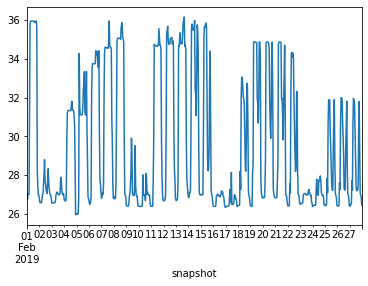

In [47]:
weighted_price.plot()